In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dpks.interpretation import BootstrapInterpreter

from sklearn.datasets import make_classification

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
design_matrix = pd.read_csv(
    #"../tests/input_files/design_sepsis.tsv",
    "/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [3]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)

In [4]:
#design_matrix['sample_num'] = design_matrix.index.values

Now, we simulate 3 groups in the data so we can perform multiple rounds of explanations

In [5]:
# design_matrix['group'] = np.where(
#     design_matrix['sample_num'] < 50, 3, design_matrix['group']
# )

In [6]:
design_matrix['group'].value_counts()

group
2    406
1    281
Name: count, dtype: int64

In [7]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
)#.impute(method="uniform_percentile", percentile=0.1)
# ).filter().normalize(
#         method="mean",
#         use_rt_sliding_window_filter=True,
#         rt_unit="second",
#         stride=5,
#         minimum_data_points=200,
#     ).quantify(method="maxlfq", top_n=5)

In [8]:
qm.to_df()

,Protein,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
0,P00747,6.369558,6.273480,6.986697,6.515837,5.695563,6.356513,7.004830,6.356030,5.910256,...,6.468140,6.453261,6.571446,6.681331,6.671234,6.622158,6.412603,6.805669,6.783759,6.550999
1,P02787,8.401196,8.880733,8.507033,8.520859,7.735718,8.295316,7.937633,8.426938,8.223306,...,8.530269,8.230319,8.321719,8.615886,8.624988,8.288215,8.365201,8.738553,8.568250,8.988438
2,P02675,9.841766,8.345927,8.950592,9.161668,9.527870,8.154696,8.627954,8.936483,8.133183,...,8.038910,9.749433,8.914521,8.701449,8.196697,8.782215,8.099411,8.209688,8.478864,7.690843
3,P01024,6.893714,7.805909,8.229213,8.362354,7.758402,8.140939,8.292043,8.141514,6.856413,...,8.218407,7.375825,7.833996,8.032924,7.923644,8.120836,8.518470,7.929849,8.055062,7.735543
4,P13671,4.900842,5.044468,5.596706,5.146233,4.364944,4.937289,5.675970,5.132487,5.044829,...,4.958072,4.358831,4.729202,5.025295,5.066806,5.272335,5.423808,4.548170,5.426075,5.013546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,P04264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,O95497,NaN,NaN,NaN,NaN,4.721399,NaN,NaN,NaN,NaN,...,3.952255,NaN,NaN,NaN,4.139811,NaN,NaN,NaN,NaN,NaN
186,P01767,8.050850,8.525077,8.029250,NaN,NaN,NaN,NaN,8.560614,NaN,...,8.260549,8.294685,NaN,8.084459,NaN,8.315475,NaN,8.301903,NaN,NaN
187,P30041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
qm_decoys_added = qm.append(
    method="mean",
    feature_column="Protein"
)

In [12]:
qm_decoys_added.sample_annotations

,sample,WHO grade,group
sample,,,
20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_002_ZeBanC_P1_A1,7,2
20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_545_ZeBanC_P4_H9,6,2
20200520_TOF1_AF_567_ZeBanC_P6_B9,20200520_TOF1_AF_567_ZeBanC_P6_B9,6,2
20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_239_ZeBanc2_P1_C12,7,2
20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_240_ZeBanc2_P3_H1,7,2
...,...,...,...
20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_468_ZeBanC_P4_C6,4,1
20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_460_ZeBanC_P4_B12,4,1
20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_454_ZeBanC_P4_B7,3,1


In [13]:
qm_decoys_added = qm_decoys_added.compare(
    method="linregress",
    min_samples_per_group=2,
    comparisons=[(2, 1)]
)

In [19]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.954249e-02,1.529553
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.719821e-08,7.429478
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.096294e-01,0.960073
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.035401e-08,7.984891
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.253692e-04,3.033685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.047780,3.902441,4.004323,0.635794,0.622574,-0.101881,3.793804e-02,406,281,7.764064e-02,1.109911
374,decoy_O95497,1,0.022002,4.505662,4.453952,0.742117,0.741505,0.051710,3.700816e-01,406,281,4.228913e-01,0.373771
375,decoy_P01767,1,0.010343,7.469483,7.494842,1.033352,1.094840,-0.025360,7.580534e-01,406,281,6.070880e-01,0.216748
376,decoy_P30041,1,0.029717,2.537551,2.608552,0.920793,0.875040,-0.071001,3.116605e-01,406,281,3.779168e-01,0.422604


In [20]:
data = qm_decoys_added.row_annotations[~qm_decoys_added.row_annotations['CorrectedPValue2-1'].isna()]

In [22]:
data

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P00747,0,0.041350,6.446830,6.507135,0.327546,0.281935,-0.060304,1.245620e-02,406,281,2.954249e-02,1.529553
1,P02787,0,0.158730,8.247865,8.412182,0.369758,0.344672,-0.164317,6.481507e-09,406,281,3.719821e-08,7.429478
2,P02675,0,0.038751,8.821600,8.741262,0.556768,0.529081,0.080338,5.855207e-02,406,281,1.096294e-01,0.960073
3,P01024,0,0.166435,8.186332,8.032181,0.339157,0.303353,0.154151,1.736267e-09,406,281,1.035401e-08,7.984891
4,P13671,0,0.072449,5.097814,5.007745,0.330946,0.295200,0.090069,2.734046e-04,406,281,9.253692e-04,3.033685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,1,0.047780,3.902441,4.004323,0.635794,0.622574,-0.101881,3.793804e-02,406,281,7.764064e-02,1.109911
374,decoy_O95497,1,0.022002,4.505662,4.453952,0.742117,0.741505,0.051710,3.700816e-01,406,281,4.228913e-01,0.373771
375,decoy_P01767,1,0.010343,7.469483,7.494842,1.033352,1.094840,-0.025360,7.580534e-01,406,281,6.070880e-01,0.216748
376,decoy_P30041,1,0.029717,2.537551,2.608552,0.920793,0.875040,-0.071001,3.116605e-01,406,281,3.779168e-01,0.422604


<Axes: xlabel='Log2FoldChange2-1', ylabel='-Log10CorrectedPValue2-1'>

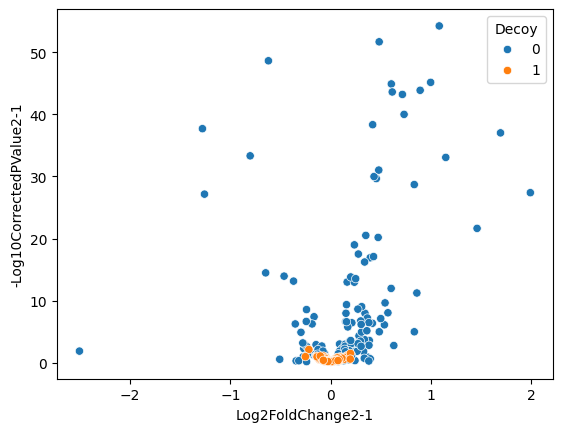

In [24]:
import seaborn as sns


sns.scatterplot(
    data=data,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Decoy"
)

In [25]:
import xgboost

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

qm_decoys_added = qm_decoys_added.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

In [16]:
# combined_features = pd.merge(
#     [X.reset_index(drop=True), decoy_features],
#     #axis=0
# )
combined_features.shape

(687, 378)

In [17]:
interpreter = BootstrapInterpreter(
    n_iterations=10,
    feature_names=combined_features.columns.values,
    downsample_background=False
)

In [18]:
import xgboost

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

In [19]:
from sklearn.model_selection import cross_val_score
from dpks.classification import Classifier

scores = cross_val_score(clf, combined_features, y, cv=3)
scores

array([0.81222707, 0.82969432, 0.86899563])

In [20]:
interpreter.fit(combined_features, y, clf)

In [21]:
importances = interpreter.importances.copy()

In [22]:
from scipy.stats import f_oneway

In [23]:
feature_pvalues = list()
feature_variance = list()
feature_mean_diffs = list()

for col in combined_features.columns:
    
    feature_values = combined_features.loc[:, col]
    feature_a_values = feature_values.values[np.argwhere(y['label'].values == 0).ravel()]
    feature_b_values = feature_values.values[np.argwhere(y['label'].values == 1).ravel()]

    feature_a_values = feature_a_values[feature_a_values > 0]
    feature_b_values = feature_b_values[feature_b_values > 0]
    
    feature_pvalues.append(f_oneway(
        feature_a_values,
        feature_b_values
    ).pvalue)

    feature_variance.append(np.nanvar(feature_values))

    # feature_class_correlation.append(np.correlate(
    #     np.sort(feature_values[np.argwhere(y == 0).ravel()]),
    #     np.sort(feature_values[np.argwhere(y == 1).ravel()])feature_class_correlation = list()
    # )[0])

    feature_mean_diffs.append(
        np.abs(np.mean(feature_a_values) - np.mean(feature_b_values))
    )


In [24]:
feature_stats = pd.DataFrame(
    {
        "feature": combined_features.columns.values,
        "pvalue": feature_pvalues,
        "variance": feature_variance,
        #"correlation": feature_class_correlation,
        "feature_diff": feature_mean_diffs
    }  
)

In [25]:
importances = importances.set_index("feature").join(
    feature_stats.set_index("feature")
)
importances

,iteration_0_shap,iteration_0_rank,iteration_1_shap,iteration_1_rank,iteration_2_shap,iteration_2_rank,iteration_3_shap,iteration_3_rank,iteration_4_shap,iteration_4_rank,...,iteration_9_rank,mean_shap,median_shap,stdev_shap,mean_rank,median_rank,stdev_rank,pvalue,variance,feature_diff
feature,,,,,,,,,,,,,,,,,,,,,
P00747,0.007306,121.0,0.000000,254.5,0.000000,255.5,0.084784,62.0,0.000000,250.5,...,246.5,0.009209,0.000000,0.026653,220.40,252.25,69.398127,1.245620e-02,0.096795,0.060304
P02787,0.000000,250.0,0.000000,254.5,0.000000,255.5,0.000000,256.0,0.000000,250.5,...,68.0,0.005497,0.000000,0.017382,234.85,253.00,58.664796,6.481507e-09,0.135917,0.164317
P02675,0.000000,250.0,0.000000,254.5,0.064020,51.0,0.000000,256.0,0.000000,250.5,...,246.5,0.006402,0.000000,0.020245,232.25,252.25,63.750926,5.855207e-02,0.299254,0.080338
P01024,0.070992,58.0,0.590991,3.0,0.149481,20.0,0.333381,9.0,0.270997,11.0,...,14.0,0.262577,0.257198,0.145522,20.60,15.50,16.747803,1.736267e-09,0.111362,0.154151
P13671,0.000000,250.0,0.022969,121.0,0.000000,255.5,0.000000,256.0,0.000000,250.5,...,246.5,0.006800,0.000000,0.015249,222.35,251.50,64.423102,2.734046e-04,0.102331,0.090069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decoy_P04264,0.000000,250.0,0.000000,254.5,0.000000,255.5,0.010246,132.0,0.000000,250.5,...,246.5,0.001025,0.000000,0.003240,240.30,252.25,38.158442,3.525984e-01,0.402637,0.045841
decoy_O95497,0.000000,250.0,0.000000,254.5,0.000000,255.5,0.000000,256.0,0.040530,84.0,...,101.0,0.020247,0.012043,0.024691,173.40,180.00,84.913616,9.957545e-01,0.540674,0.000304
decoy_P01767,0.000000,250.0,0.000000,254.5,0.000000,255.5,0.000000,256.0,0.000000,250.5,...,246.5,0.000000,0.000000,0.000000,252.70,253.00,3.065942,9.887765e-01,1.043354,0.001117


In [26]:
importances = importances.reset_index()

In [27]:
first_test_columns = [
    'mean_shap',
    #'median_shap',
    'stdev_shap',
    'mean_rank',
    #'median_rank',
    'stdev_rank',
    'pvalue',
    "variance",
    "feature_diff",
    #"correlation"
]

In [28]:
X_importances = importances[first_test_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [30]:
X_importances

,mean_shap,stdev_shap,mean_rank,stdev_rank,pvalue,variance,feature_diff
0,0.011600,0.099127,0.871058,0.578282,1.250930e-02,0.004784,0.023972
1,0.006924,0.064646,0.928743,0.486801,6.509142e-09,0.013215,0.065494
2,0.008064,0.075293,0.918363,0.530150,5.880171e-02,0.048414,0.031970
3,0.330750,0.541214,0.073453,0.129539,1.743669e-09,0.007923,0.061436
4,0.008565,0.056711,0.878842,0.535879,2.745702e-04,0.005977,0.035854
...,...,...,...,...,...,...,...
373,0.001291,0.012050,0.950499,0.312024,3.541017e-01,0.070694,0.018198
374,0.025504,0.091829,0.683433,0.710522,1.000000e+00,0.100441,0.000020
375,0.000000,0.000000,1.000000,0.012927,9.929923e-01,0.208771,0.000344
376,0.004968,0.046385,0.938922,0.390011,8.000698e-01,0.163701,0.007069


In [31]:
from sklearn.model_selection import cross_val_score
from dpks.classification import Classifier

clf = Classifier(
    xgboost.XGBClassifier(
        max_depth=2,
        #subsample=0.5,
        reg_lambda=2,
        objective="binary:logistic",
        seed=42
    )
)

scores = cross_val_score(clf, X_importances, y, cv=3)
scores

array([0.8015873 , 0.8015873 , 0.81746032])

In [32]:
clf.fit(X_importances, y)

feature_importances = pd.DataFrame({
"feature": X_importances.columns,
    "shap": clf.feature_importances_
}
    
)

feature_importances

,feature,shap
0,mean_shap,0.108849
1,stdev_shap,0.335772
2,mean_rank,0.449450
3,stdev_rank,0.221076
4,pvalue,0.999704
5,variance,0.720320
6,feature_diff,2.649337


In [33]:
from sklearn.linear_model import LogisticRegression


clf = xgboost.XGBClassifier(
        max_depth=2,
        #subsample=0.5,
        reg_lambda=2,
        objective="binary:logistic",
        seed=42
    )

#clf = LogisticRegression()


In [34]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [35]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

In [36]:
feature_score_results.sort_values("feature_score", ascending=False).head(25)

,feature_name,label,feature_score
151,Q15166,1,7.619014
182,P01763,1,7.520831
134,P08185,1,7.450750
105,Q9NZP8,1,7.173667
144,P04430,1,7.107885
43,P00742,1,6.795305
185,O95497,1,6.757073
180,P0DP08,1,6.757073
178,A0A075B6R2,1,6.757073
129,P02671,1,6.726058


<Axes: xlabel='feature_score', ylabel='Count'>

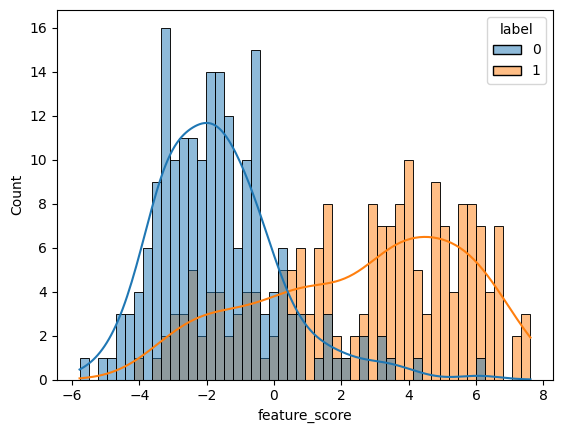

In [37]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [47]:
from dpks.fdr import DecoyCounter, ScoreDistribution

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

# score_dist = ScoreDistribution()
# score_dist.fit(
#     feature_score_results['feature_score'].values, feature_score_results['label']
# )
# feature_score_results['q_value'] = score_dist.q_values(
#     feature_score_results['feature_score']
# )

In [48]:
feature_score_results.sort_values("feature_score", ascending=False).head(25)

,feature_name,label,feature_score,q_value
151,Q15166,1,7.619014,0.000000
182,P01763,1,7.520831,0.000000
134,P08185,1,7.450750,0.000000
105,Q9NZP8,1,7.173667,0.000000
144,P04430,1,7.107885,0.000000
43,P00742,1,6.795305,0.000000
185,O95497,1,6.757073,0.000000
180,P0DP08,1,6.757073,0.000000
178,A0A075B6R2,1,6.757073,0.000000
129,P02671,1,6.726058,0.000000


In [51]:
importances[importances['feature']=="decoy_P01780"]

,feature,iteration_0_shap,iteration_0_rank,iteration_1_shap,iteration_1_rank,iteration_2_shap,iteration_2_rank,iteration_3_shap,iteration_3_rank,iteration_4_shap,...,iteration_9_rank,mean_shap,median_shap,stdev_shap,mean_rank,median_rank,stdev_rank,pvalue,variance,feature_diff
324,decoy_P01780,0.0,250.0,0.0,254.5,0.0,255.5,0.0,256.0,0.0,...,246.5,0.013213,0.0,0.02831,217.35,251.25,73.792521,0.001797,0.165192,0.098293


In [41]:
feature_score_results.sort_values("feature_score", ascending=False)

,feature_name,label,feature_score,q_value
151,Q15166,1,7.619014,0.000000
182,P01763,1,7.520831,0.000000
134,P08185,1,7.450750,0.032258
105,Q9NZP8,1,7.173667,0.032258
144,P04430,1,7.107885,0.032258
...,...,...,...,...
268,decoy_P01718,0,-4.582833,0.478603
325,decoy_A0A075B6J1,0,-4.690454,0.480471
318,decoy_P02671,0,-4.887698,0.483393
375,decoy_P01767,0,-4.984776,0.484773


In [82]:
all_columns = [col for col in importances.columns if col != "feature"]

In [83]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [84]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [85]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=3)
scores

array([0.94444444, 0.96031746, 0.96031746])

In [86]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=3,
    method='predict_proba'
)[:, 1]

In [87]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

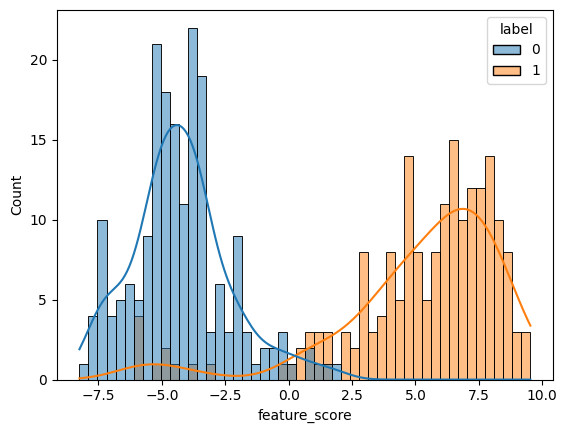

In [88]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50, 
    kde=True
)

In [81]:
from dpks.fdr import DecoyCounter, ScoreDistribution

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

# score_distribution = ScoreDistribution()
# score_distribution.fit(feature_score_results['feature_score'].values, feature_score_results['label'].ravel())
# feature_score_results['q_value'] = score_distribution.calculate_q_values(
#     feature_score_results['feature_score']
# )

In [83]:
feature_score_results.sort_values("q_value").head(15)

,feature_name,label,feature_score,q_value
31,P36955,1,6.698006,0.000000
181,A0A0B4J1V1,1,6.607372,0.000000
185,O95497,1,7.091609,0.000000
104,Q9Y490,1,6.942913,0.000000
102,A0A0B4J1Y9,1,7.970609,0.000000
83,Q68DL7,1,7.229476,0.000000
129,P02671,1,6.691295,0.000000
53,P51884,1,3.543287,0.010638
157,P01601,1,3.553112,0.010753
21,P07357,1,3.669851,0.010870


In [84]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
31,P36955,1,6.698006,0.0
83,Q68DL7,1,7.229476,0.0
102,A0A0B4J1Y9,1,7.970609,0.0
104,Q9Y490,1,6.942913,0.0
129,P02671,1,6.691295,0.0
181,A0A0B4J1V1,1,6.607372,0.0
185,O95497,1,7.091609,0.0


In [57]:
feature_stats[feature_stats['pvalue'] <= 0.1]

,feature,pvalue,variance,correlation,feature_diff
0,P00747,1.494271e-02,0.096795,23521.305712,0.030152
1,P02787,1.232473e-08,0.135917,39962.543779,0.082159
3,P01024,3.293311e-02,0.111362,33016.291714,0.077076
4,P13671,6.157188e-04,0.102331,14186.332759,0.045035
5,P10643,4.569501e-06,0.263885,17553.192617,0.106419
...,...,...,...,...,...
250,decoy_P05109,8.966535e-02,2.993094,17574.243405,0.121551
269,decoy_Q15848,8.346383e-02,2.227106,6458.362041,0.118352
299,decoy_A0A0B4J1X8,1.743133e-02,2.326910,18529.954406,0.145685
365,decoy_P01871,3.037256e-02,4.077021,14781.034849,0.217261


In [58]:
top10 = interpreter.select_features(
    top_n=10,
    percent=1.0,
    method="count",
)
top10_counts = interpreter.feature_counts.copy()
top10_counts = top10_counts.rename(
    columns={"count": "top10_count"}
)
top10_counts

,feature,top10_count
0,P06396,1.00
1,P25311,0.99
2,P02760,0.92
3,P05109,0.84
4,P01833,0.53
...,...,...
77,decoy_A0A0B4J1X8,0.01
78,A0A0C4DH33,0.01
79,decoy_P55056,0.01
80,decoy_A0A075B6J1,0.01


In [59]:
top25 = interpreter.select_features(
    top_n=25,
    percent=1.0,
    method="count",
)
top25_counts = interpreter.feature_counts.copy()
top25_counts = top25_counts.rename(
    columns={"count": "top25_count"}
)
top25_counts

,feature,top25_count
0,P06396,1.00
1,P02760,1.00
2,P25311,1.00
3,P05109,0.94
4,P04180,0.81
...,...,...
187,decoy_P51884,0.01
188,decoy_P06727,0.01
189,P01880,0.01
190,P01780,0.01


In [60]:
importances = importances.set_index("feature").join(
    top10_counts.set_index("feature")
)
importances = importances.join(
    top25_counts.set_index("feature")
)
importances = importances.reset_index()
importances

,feature,iteration_0_shap,iteration_0_rank,iteration_1_shap,iteration_1_rank,iteration_2_shap,iteration_2_rank,iteration_3_shap,iteration_3_rank,iteration_4_shap,...,stdev_shap,mean_rank,median_rank,stdev_rank,pvalue,variance,correlation,feature_diff,top10_count,top25_count
0,P00747,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.051445,76.0,0.000000,...,0.024746,231.345,254.50,58.351283,1.494271e-02,0.096795,23521.305712,0.030152,NaN,NaN
1,P02787,0.120079,31.0,0.000000,257.0,0.070385,53.0,0.000000,250.5,0.000000,...,0.050687,197.320,252.50,87.668698,1.232473e-08,0.135917,39962.543779,0.082159,NaN,0.02
2,P02675,0.000000,255.0,0.000000,257.0,0.040231,74.0,0.000000,250.5,0.039600,...,0.025949,217.625,254.25,72.146399,2.628272e-01,0.299254,50786.647514,0.040169,NaN,NaN
3,P01024,0.211212,14.0,0.541160,8.0,0.161489,21.0,0.193591,18.0,0.259612,...,0.170307,18.990,13.00,18.230563,3.293311e-02,0.111362,33016.291714,0.077076,0.39,0.77
4,P13671,0.024483,106.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.036954,226.680,254.25,66.279730,6.157188e-04,0.102331,14186.332759,0.045035,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,decoy_P04264,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.014304,238.580,254.50,47.391275,3.124112e-01,0.186809,37.374692,0.019023,NaN,NaN
374,decoy_O95497,0.036867,83.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.027817,218.110,253.50,71.166315,6.881863e-01,2.151720,3596.920214,0.038298,NaN,NaN
375,decoy_P01767,0.025020,103.0,0.142833,42.0,0.000000,253.0,0.032608,98.0,0.000000,...,0.069605,154.605,118.00,94.677717,2.064817e-01,11.073108,4501.352192,0.196166,NaN,0.08
376,decoy_P30041,0.000000,255.0,0.000000,257.0,0.000000,253.0,0.000000,250.5,0.000000,...,0.025350,243.500,254.50,44.074661,2.333545e-01,0.134044,32.219250,0.017553,NaN,NaN


In [61]:
importances[['top10_count', 'top25_count']] = importances[['top10_count', 'top25_count']].fillna(0.0)

In [62]:
all_columns = [col for col in importances.columns if col != "feature"]

In [63]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [64]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [65]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=5)
scores

array([0.84210526, 0.77631579, 0.76315789, 0.77333333, 0.78666667])

In [66]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [67]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

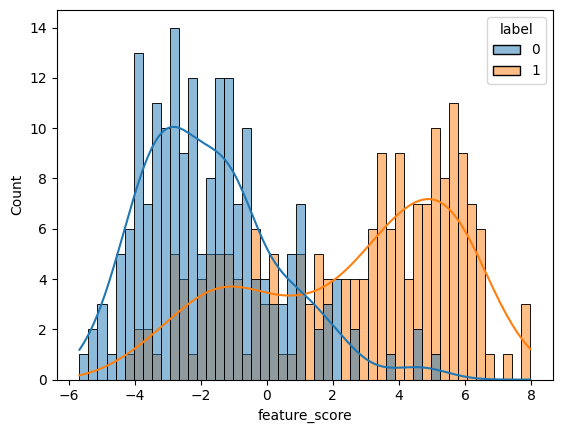

In [68]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [69]:
from dpks.fdr import DecoyCounter

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

In [70]:
# from dpks.fdr import ScoreDistribution

# score_dist = ScoreDistribution()

# score_dist.fit(feature_score_results['feature_score'].values, feature_score_results['label'].values)

# feature_score_results['q_value'] = score_dist.calculate_q_values(feature_score_results['feature_score'])

In [71]:
feature_score_results.sort_values("q_value").head(10)

,feature_name,label,feature_score,q_value
102,A0A0B4J1Y9,1,7.879889,0.0
35,P00918,1,6.074848,0.0
77,P18428,1,6.277279,0.0
39,P02750,1,6.373821,0.0
40,P02765,1,6.855932,0.0
41,P02760,1,5.876361,0.0
162,P48740,1,5.650722,0.0
43,P00742,1,7.944367,0.0
45,P08571,1,5.585175,0.0
46,P01833,1,6.383440,0.0


In [72]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
1,P02787,1,5.849770,0.0
14,P08603,1,6.201719,0.0
18,P02749,1,7.978234,0.0
19,P02748,1,5.236446,0.0
22,P01023,1,5.546393,0.0
25,A0A075B6I1,1,5.364092,0.0
33,P01034,1,5.531204,0.0
35,P00918,1,6.074848,0.0
39,P02750,1,6.373821,0.0
40,P02765,1,6.855932,0.0


In [75]:
feature_score_results.sort_values("feature_score", ascending=False).head(10)

,feature_name,label,feature_score,q_value
18,P02749,1,7.978234,0.0
43,P00742,1,7.944367,0.0
102,A0A0B4J1Y9,1,7.879889,0.0
99,A0A0C4DH31,1,7.285092,0.0
40,P02765,1,6.855932,0.0
125,P00734,1,6.595318,0.0
92,P23083,1,6.566779,0.0
49,P02790,1,6.561945,0.0
50,Q08380,1,6.473228,0.0
46,P01833,1,6.383440,0.0


In [82]:
feature_score_results[feature_score_results['feature_name'] == "P06396"]

,feature_name,label,feature_score,q_value
17,P06396,1,5.137033,0.022121


In [211]:
import re
shap_column = re.compile('iteration_._shap')
rank_column = re.compile('iteration_._rank')



In [212]:
all_columns = [col for col in importances.columns if col != "feature" and (re.match(shap_column, col) or re.match(rank_column, col))]

In [214]:
X_importances = importances[all_columns].copy()
y = np.where(
    importances['feature'].str.contains("decoy"), 0, 1
)

In [215]:
scaler = MinMaxScaler()

X_importances[X_importances.columns] = scaler.fit_transform(
    X_importances[X_importances.columns]
)

In [216]:
from sklearn.model_selection import cross_val_score

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

scores = cross_val_score(clf, X_importances, y, cv=5)
scores

array([0.62612613, 0.56306306, 0.57207207, 0.58371041, 0.54298643])

In [217]:
from sklearn.model_selection import cross_val_predict

feature_scores = cross_val_predict(
    clf,
    X_importances,
    y,
    cv=5,
    method='predict_proba'
)[:, 1]

In [218]:
feature_score_results = pd.DataFrame(
    {
        'feature_name': importances['feature'],
        'label': y,
        'feature_score': np.log(feature_scores/(1 - feature_scores))
    }
)

<Axes: xlabel='feature_score', ylabel='Count'>

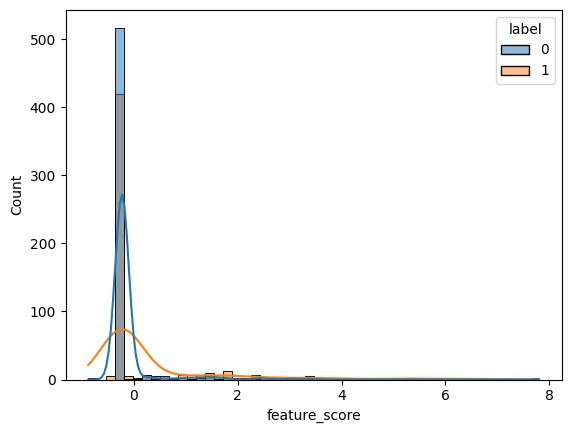

In [219]:
sns.histplot(
    data=feature_score_results,
    x="feature_score",
    hue="label",
    bins=50,
    kde=True
)

In [220]:
from dpks.fdr import DecoyCounter

decoy_counter = DecoyCounter()

feature_score_results['q_value'] = decoy_counter.calc_q_values(
    feature_score_results['feature_score'], feature_score_results['label']
)

In [221]:
# from dpks.fdr import ScoreDistribution

# score_dist = ScoreDistribution()

# score_dist.fit(feature_score_results['feature_score'].values, feature_score_results['label'].values)

# feature_score_results['q_value'] = score_dist.calculate_q_values(feature_score_results['feature_score'])

In [222]:
feature_score_results.sort_values("q_value").head(10)

,feature_name,label,feature_score,q_value
89,P00742,1,3.514226,0.0
340,P02654,1,6.938592,0.0
347,P08493,1,6.412497,0.0
380,Q6EMK4,1,7.120214,0.0
387,P01742,1,4.786363,0.0
98,P33151,1,5.083447,0.0
412,P35858,1,7.802390,0.0
182,Q9NZP8,1,7.184788,0.0
438,P22352,1,3.678231,0.0
35,P61626,1,5.228684,0.0


In [223]:
feature_score_results[feature_score_results['q_value']<= 0.01]

,feature_name,label,feature_score,q_value
19,P19823,1,5.391632,0.0
35,P61626,1,5.228684,0.0
39,Q04756,1,3.949562,0.0
41,P06727,1,5.407914,0.0
59,Q08380,1,6.234293,0.0
63,P19827,1,4.289401,0.0
78,P05362,1,6.234293,0.0
89,P00742,1,3.514226,0.0
98,P33151,1,5.083447,0.0
147,P08571,1,5.621173,0.0


In [225]:
feature_score_results.sort_values("feature_score", ascending=False)

,feature_name,label,feature_score,q_value
412,P35858,1,7.802390,0.000000
338,Q06033,1,7.798312,0.000000
182,Q9NZP8,1,7.184788,0.000000
380,Q6EMK4,1,7.120214,0.000000
340,P02654,1,6.938592,0.000000
...,...,...,...,...
399,Q8N6C8,1,-0.415670,0.501812
314,P12111,1,-0.510316,0.501357
351,P01765,1,-0.791552,0.500904
395,P14151,1,-0.875061,0.500452
